In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 이용객 로그 데이터를 활용한 특정일의 시간대별 이용객 변화량 시각화

## 데이터 로딩후 RDD 생성
- tripdata : 2020년 3월 1일 우버 이용객 데이터
- trip_tmp: 2020/02/29 23:00~ 2020/03/02 12:00 우버 이용객 데이터
- 대용량 데이터인 관계로 부분추출해서 진행하기 위해 생성한 tmp_data

In [4]:
lines = sc.textFile('/rdd/trip_tmp.csv')
lines

/rdd/trip_tmp.csv MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [5]:
lines.getNumPartitions()

2

## 필요한 부분만 추출하기
- 첫번째 line의 data 확인 (collect로 하면 오래걸릴 것 같아서 첫줄만 확인)

In [8]:
#first() 라는 action 메소드 사용: rdd data의 첫번째 요소 반환
header = lines.first()

In [9]:
header #우버 이용현황 data의 컬럼명이 문자열로구성

',dispatching_base_num,request_datetime,driver_pay'

In [10]:
# header를 제외한 나머지 data rdd객체만 생성 - rddData는 부분 접근 불가
filter_lines = lines.filter(lambda row: row != header)

In [11]:
filter_lines

PythonRDD[6] at RDD at PythonRDD.scala:53

In [12]:
filter_lines.collect()

['0,B02510,2020-03-01 0:00,19.65',
 '1,B02510,2020-03-01 0:22,9.37',
 '2,B02764,2020-02-29 23:57,16.24',
 '3,B02764,2020-03-01 0:04,21.76',
 '4,B02764,2020-03-01 0:42,19.64',
 '5,B02682,2020-03-01 0:13,35.85',
 '6,B02764,2020-02-29 23:54,31.39',
 '7,B02764,2020-03-01 0:38,5.39',
 '8,B02764,2020-03-01 0:45,10.29',
 '9,B02764,2020-03-01 0:13,5.39',
 '10,B02764,2020-03-01 0:26,8.98',
 '11,B02764,2020-03-01 0:39,13.38',
 '12,B02765,2020-03-01 0:06,9.29',
 '13,B02765,2020-03-01 0:21,11.14',
 '14,B02765,2020-03-01 0:38,5.39',
 '15,B02765,2020-03-01 0:52,5.42',
 '16,B02764,2020-03-01 0:52,7.14',
 '17,B02764,2020-03-01 0:06,8.3',
 '18,B02764,2020-03-01 0:23,36',
 '19,B02510,2020-03-01 0:23,0',
 '20,B02864,2020-03-01 0:29,12.55',
 '21,B02864,2020-03-01 0:46,12.32',
 '22,B02510,2020-03-01 0:07,7.53',
 '23,B02510,2020-03-01 0:18,0',
 '24,B02510,2020-03-01 0:18,0',
 '25,B02510,2020-03-01 0:23,0',
 '26,B02764,2020-03-01 0:02,7',
 '27,B02764,2020-03-01 0:13,13.98',
 '28,B02764,2020-03-01 0:34,23.29'


```python
def f(row):
    return row != header
lines.filter(f) 
```

*데이터*
```
 '(순번, ?, 탑승시간, 이용요금)
 '0,B02510,2020-03-01 0:00,19.65',
 '1,B02510,2020-03-01 0:22,9.37',
 '2,B02764,2020-02-29 23:57,16.24',
 '3,B02764,2020-03-01 0:04,21.76',
 '4,B02764,2020-03-01 0:42,19.64',
...
```
- 날짜 시간 data 활용해서
    - 날짜별로 counting해서 그래프로 연결
      - data 자체가 날짜별로 불균형해서 의미없지만 연습이니까 그냥 쓰기
    - 시간별 counting해서 시계열 그래프로 연결
      - 3/1, 3/2의 공통 수집 시간이 0~12시, ==> 이 시간대 별 이용객 추출해서 시계열 그래프로 표현

In [13]:
dates = filter_lines.map(lambda x: x.split(",")[2].split(" ")[0])

In [14]:
dates.collect()

['2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-

**map()**함수로 우리가 원하는 부분만 추출 할 수 있다


추출하는 함수
```python
lambda x: x.split(",")[2].split(" ")[0]

```
아래와 같다

```python]
def f(x):
    return x.split(",")[2].split(" ")[0]
```


오리지널 데이터
```
HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,
```

x.split(",")
```
[HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,]
```


x.split(",")[2]
```
[2020-03-01 00:03:40]
```


x.split(",")[2].split(" ")
```
[2020-03-01,00:03:40]
```

x.split(",")[2].split(" ")[0]
```
2020-03-01
```

## CountByValue
- action method
- 적용하면 바로 연산 진행

In [16]:
result = dates.countByValue()
result #파이썬 자료구조

defaultdict(int,
            {'2020-03-01': 780219, '2020-02-29': 5603, '2020-03-02': 262753})

값이 얼마나 등장하는지 세준다 

예)
```
2020-03-01
2020-03-01
2020-03-01
2020-03-02
2020-03-02
2020-03-03
```
countByValue()
```
(2020-03-01,3)
(2020-03-02,2)
(2020-03-03,1)
```


**result는 이제 더이상 RDD가 아닌 Python 객체**

In [17]:
# 아래는 Spark코드가 아닌 일반적인 파이썬 코드
# 이 딕셔너리를 csv로 저장해보자 --> pandas 패키지 이용
import pandas as pd

# dict를 csv로 저장하기 위해 series로 구성해서 to_csv()활용
pd.Series(result, name="trips").to_csv("./data/rdd/trip_date.csv")

### 다시한번, 현재 data는 2/29 23시~3/2 12시까지 데이터
- 데이터 수집에서 편향이 심한 데이터이므로 비교시각화가 무의미함
- 연습용으로 그래프 그려봄

<Axes: >

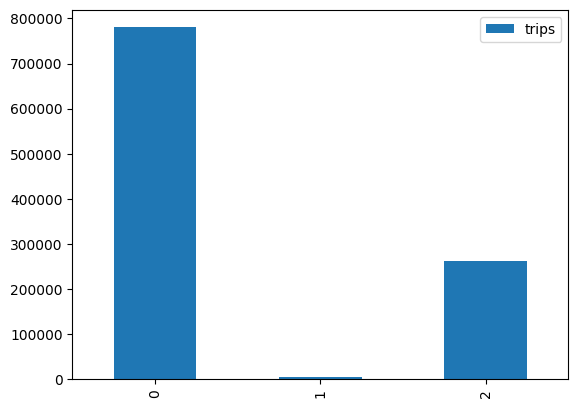

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

trips = pd.read_csv("./data/rdd/trip_date.csv")
trips.plot(kind="bar")

In [16]:
trips

,Unnamed: 0,trips
0,2020-03-01,780219
1,2020-02-29,5603
2,2020-03-02,262753


### 시간대별 여행자 count
- 3/1, 3/2 0~12시(오전) 이용객에 대해 시간대별 비교시각화 진행

In [25]:
times = filter_lines.map(lambda x: x.split(",")[2].split(" ")[1].split(":")[0])
#times.collect()

In [26]:
times

PythonRDD[11] at RDD at PythonRDD.scala:53

In [27]:
# 시간대별 이용객 집계
res_time = times.countByValue()
res_time

defaultdict(int,
            {'0': 67234,
             '23': 29809,
             '16': 40599,
             '1': 49807,
             '2': 36315,
             '3': 28311,
             '4': 23972,
             '5': 25142,
             '6': 37490,
             '7': 55134,
             '8': 65410,
             '9': 63140,
             '10': 63445,
             '11': 63164,
             '12': 47753,
             '13': 39308,
             '14': 40458,
             '15': 40546,
             '17': 41784,
             '18': 43987,
             '19': 41279,
             '20': 37956,
             '21': 35217,
             '22': 31315})

In [28]:
# dict를 시리즈로 변환 후
tmp_time = pd.Series(res_time)
tmp_time.head()

0     67234
23    29809
16    40599
1     49807
2     36315
dtype: int64

In [29]:
# 시간 data를 index로 구성
tmp_time.index = [int(idx) for idx in tmp_time.index.values]
tmp_time.head() #수치형 index

0     67234
23    29809
16    40599
1     49807
2     36315
dtype: int64

In [36]:
# 시간대별 흐름 확인 위해 index 기준으로 정렬 (index가 시간의 의미로 구성되었음)
tmp_time = tmp_time.sort_index()

In [38]:
# 0-12시까지 부분추출
finTime = tmp_time[0:13]
finTime

0     67234
1     49807
2     36315
3     28311
4     23972
5     25142
6     37490
7     55134
8     65410
9     63140
10    63445
11    63164
12    47753
dtype: int64

In [32]:
from matplotlib import pyplot as plt

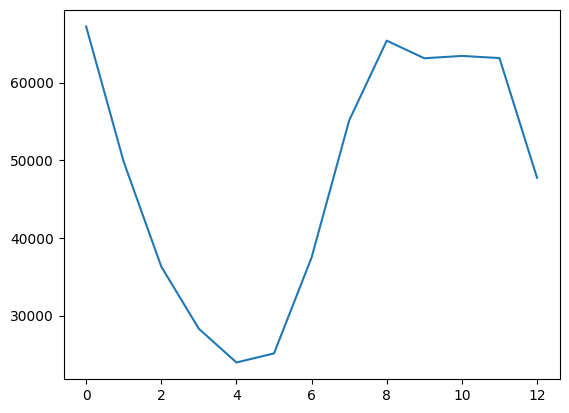

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


In [39]:
# plt.plot(data): data로 라인그래프 생성
plt.plot(finTime)